In [1]:
def HISROGRAM_BOXPLOT(X, HISTO_COLOR, LABEL):
    import numpy as np
    import matplotlib.pyplot as plt
    X = np.array(X)
    print("-------------------------")
    from scipy.stats import skew, kurtosis
    MINIMUM = np.min(X)
    MAXIMUM = np.max(X)
    #MODE = max(set(X), key=list(X).count)
    MEDIAN = np.quantile(X, .50)#q2
    MEAN = np.mean(X)
    STD = np.std(X)
    q1 = np.quantile(X, .25)
    q3 = np.quantile(X, .75)
    SKEW = skew(X)
    KURT = kurtosis(X)
    #SKEW = (MEAN - MODE) / STD
    #KURT = (np.mean((X - MEAN)**4) / STD**4)
    # Estimate confidence intervals of the output variable
    lower_bound = np.quantile(X, .05)
    upper_bound = np.quantile(X, .95)
    print("Box-Chart Datas: ")
    print(f'Minimum: {MINIMUM:.6f}')
    print(f'First quartile: {q1:.6f}')
    #print(f'Mode: {MODE:.6f}')
    print(f'Median: {MEDIAN:.6f}')
    print(f'Mean: {MEAN:.6f}')
    print(f'Std: {STD:.6f}')
    print(f'Third quartile: {q3:.6f}')
    print(f'Maximum: {MAXIMUM :.6f}')
    print(f'Skewness: {skew(X) :.6f}')
    print(f'kurtosis: {kurtosis(X) :.6f}')
    print(f"90% Confidence Interval: ({lower_bound:.6f}, {upper_bound:.6f})")
    print("-------------------------")

    plt.figure(figsize=(10,6))
    # Plot histogram of data
    count, bins, ignored = plt.hist(X, bins=100, color=HISTO_COLOR, density=True, align='mid')#, edgecolor="black"
    
    # Plot lognormal PDF
    x = np.linspace(min(bins), max(bins), 10000)
    pdf = (np.exp(-(x - MEAN)**2 / (2 * STD**2)) / (STD * np.sqrt(2 * np.pi)))
    plt.plot(x, pdf, linewidth=2, color='r', label="Normal PDF")
    
    # Plot vertical lines for risk measures
    plt.axvline(q1, color="black", linestyle="--", label=f"Quantile 0.25: {q1:.6f}")
    plt.axvline(MEDIAN, color="green", linestyle="--", label=f"Median: {MEDIAN:.6f}")
    plt.axvline(q3, color="black", linestyle="--", label=f"Quantile 0.75: {q3:.6f}")
    #plt.axvline(MODE, color="purple", linestyle="--", label=f"Mode: {MODE:.6f}")
    plt.axvline(MEAN, color="red", linestyle="--", label=f"Mean: {MEAN:.6f}")
    plt.axvline(MEAN-STD, color="blue", linestyle="--", label=f"Mean-Std: {MEAN-STD:.6f}")
    plt.axvline(MEAN+STD, color="blue", linestyle="--", label=f"Mean+Std: {MEAN+STD:.6f}")
    plt.xlabel(LABEL)
    plt.ylabel("Frequency")
    prob = np.sum(X > 0) / len(X)
    plt.title(f"Histogram - Probability of Positive {LABEL} is {100*prob:.2f} %")
    plt.legend()
    #plt.grid()
    plt.show()

    #Plot boxplot with outliers
    plt.figure(figsize=(10,6))
    plt.boxplot(X, vert=0)
    # Write the quartile data on the chart
    plt.text(q1, 1.05, f" Q1: {q1:.6f}")
    plt.text(MEDIAN, 1.1, f" Q2: {MEDIAN:.6f}")
    plt.text(q3, 1.05, f" Q3: {q3:.6f}")
    #plt.text(MODE, 1.15, f" Mode: {MODE:.6f}")
    
    #plt.text(MEAN, 0.9, f" Mean: {MEAN:.6f}")
    #plt.text(MEAN-STD, 0.9, f" Mean-Std: {MEAN-STD:.6f}")
    #plt.text(MEAN+STD, 0.9, f" Mean+Std: {MEAN+STD:.6f}")
    plt.scatter(MEAN, 1, color="red", marker="+", s=200, label=f"Mean: {MEAN:.6f}")
    plt.scatter(MEAN-STD, 1, color="green", marker="X", s=200, label=f"Mean-Std: {MEAN-STD:.6f}")
    plt.scatter(MEAN+STD, 1, color="blue", marker="*", s=200, label=f"Mean+Std:  {MEAN+STD:.6f}")
    plt.xlabel(LABEL)
    plt.ylabel("Data")
    plt.title(f"Boxplot of {LABEL}")
    plt.legend()
    plt.grid()
    plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
NumFiles = 1000  # number of files

# Base names of files
NameFiles_D = 'NON_DYN_CONFINED\DFree_'  # DISPLACEMENT
NameFiles_V = 'NON_DYN_CONFINED\VFree_'  # VELOCITY
NameFiles_A = 'NON_DYN_CONFINED\AFree_'  # ACCELERATION

# Code
MaxAbsCol_D = np.zeros(NumFiles)
MaxAbsCol_V = np.zeros(NumFiles)
MaxAbsCol_A = np.zeros(NumFiles)

for i in range(1, NumFiles + 1):
    
    # Read and process displacement data
    filename_D = f"{NameFiles_D}{i}.txt"
    A = np.loadtxt(filename_D)
    MaxAbsCol_D[i - 1] = max(abs(A[:, 1]))
    
    # Read and process velocity data
    filename_V = f"{NameFiles_V}{i}.txt"
    A = np.loadtxt(filename_V)
    MaxAbsCol_V[i - 1] = max(abs(A[:, 1]))
    
    # Read and process acceleration data
    filename_A = f"{NameFiles_A}{i}.txt"
    A = np.loadtxt(filename_A)
    MaxAbsCol_A[i - 1] = max(abs(A[:, 1]))
    





# Write Output
np.savetxt('NON_DYN_CONFINED\TOT_D.txt', MaxAbsCol_D, fmt='%f')
np.savetxt('NON_DYN_CONFINED\TOT_V.txt', MaxAbsCol_V, fmt='%f')
np.savetxt('NON_DYN_CONFINED\TOT_A.txt', MaxAbsCol_A, fmt='%f')


-------------------------
Box-Chart Datas: 
Minimum: 0.000197
First quartile: 0.000236
Median: 0.000264
Mean: 0.000254
Std: 0.000024
Third quartile: 0.000267
Maximum: 0.000334
Skewness: -0.548894
kurtosis: 0.944433
90% Confidence Interval: (0.000200, 0.000277)
-------------------------


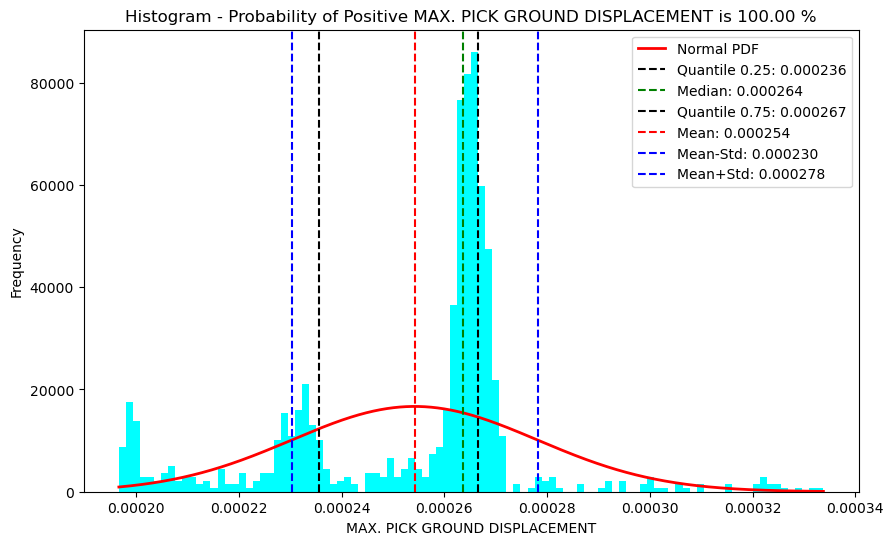

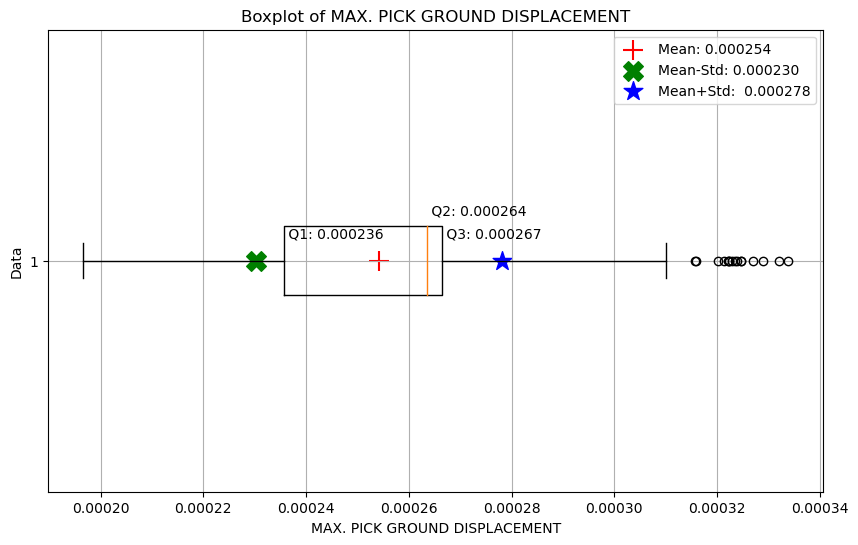

In [3]:
HISROGRAM_BOXPLOT(MaxAbsCol_D, HISTO_COLOR='cyan', LABEL='MAX. PICK GROUND DISPLACEMENT')

-------------------------
Box-Chart Datas: 
Minimum: 0.008038
First quartile: 0.010196
Median: 0.010729
Mean: 0.010743
Std: 0.001287
Third quartile: 0.011566
Maximum: 0.015466
Skewness: 0.151002
kurtosis: 0.853832
90% Confidence Interval: (0.008222, 0.012515)
-------------------------


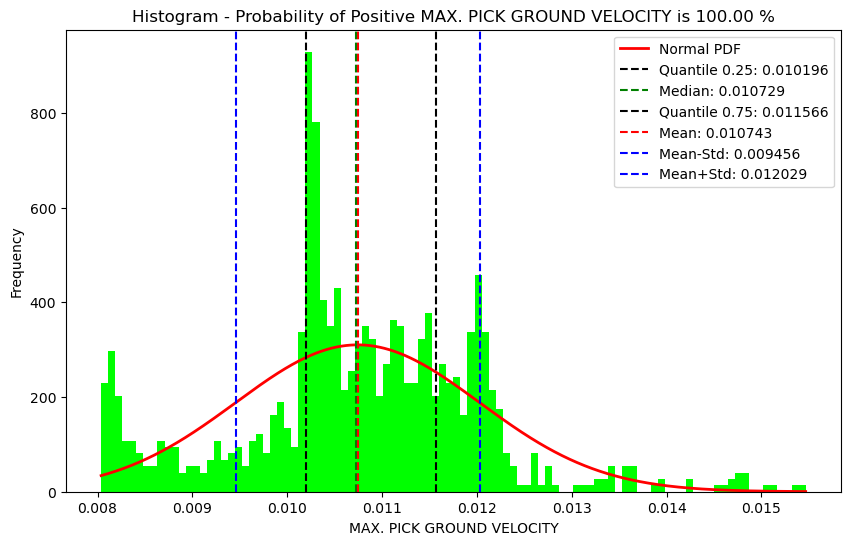

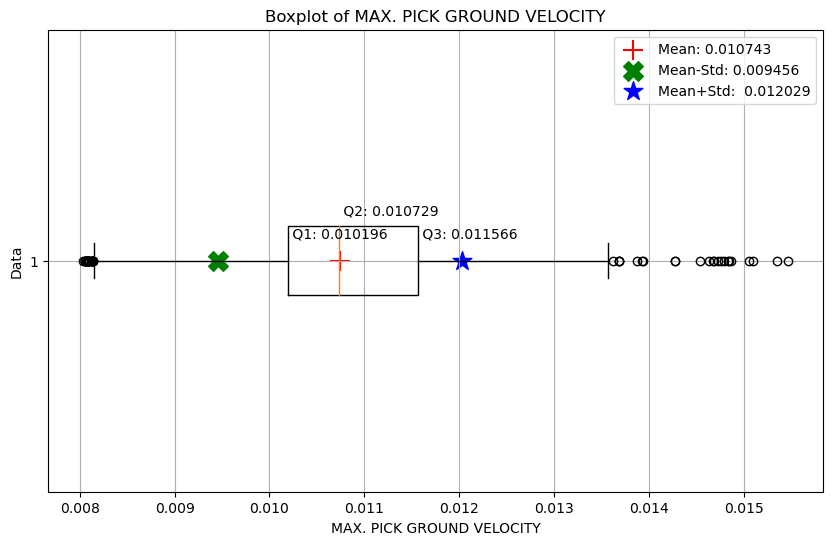

In [4]:
HISROGRAM_BOXPLOT(MaxAbsCol_V, HISTO_COLOR='lime', LABEL='MAX. PICK GROUND VELOCITY')

-------------------------
Box-Chart Datas: 
Minimum: 0.469598
First quartile: 0.594847
Median: 0.619123
Mean: 0.628882
Std: 0.058822
Third quartile: 0.665660
Maximum: 0.864145
Skewness: 0.633658
kurtosis: 2.240175
90% Confidence Interval: (0.531001, 0.707808)
-------------------------


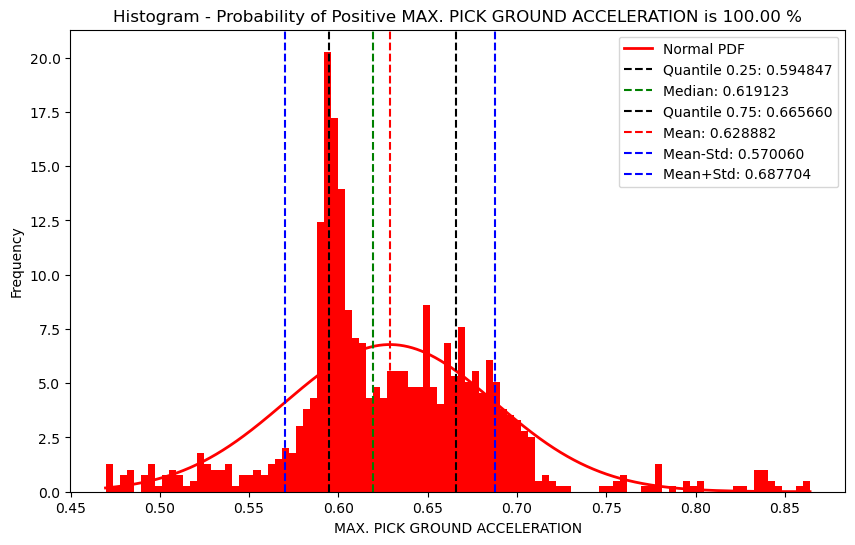

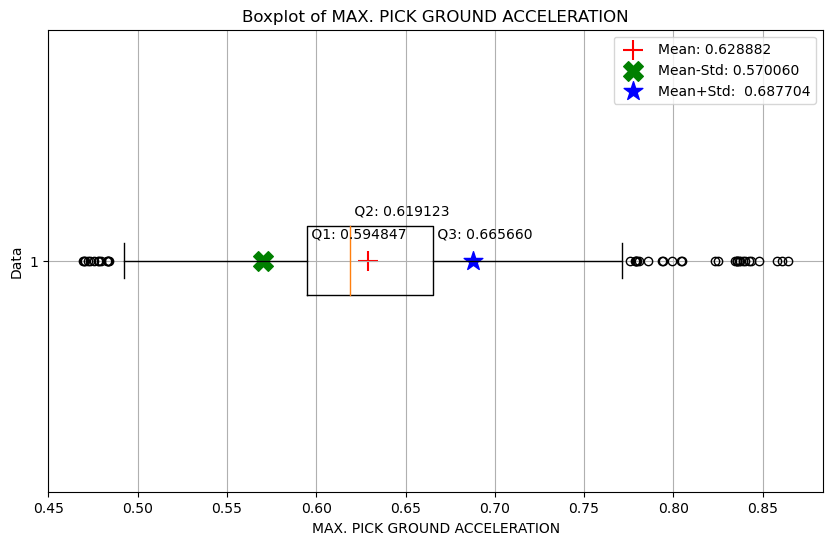

In [5]:
HISROGRAM_BOXPLOT(MaxAbsCol_A, HISTO_COLOR='red', LABEL='MAX. PICK GROUND ACCELERATION')